## 🧾 Introduction: Image Compression with SVD

Image compression using **Singular Value Decomposition (SVD)** is a linear algebra-based technique that approximates an image by reducing its rank while preserving essential structure. Any grayscale image can be represented as a 2D matrix, and SVD decomposes this matrix into three components:

$A = U \Sigma V^T$

Here:
- $U$ and $V^T$ are orthogonal matrices.
- $\Sigma$ is a diagonal matrix containing singular values, representing the energy (or importance) of each component.

By retaining only the top $k$ singular values (i.e., the most important features), we can reconstruct a compressed version of the original image:

$A_k \approx U_k \Sigma_k V_k^T$

This technique reduces storage cost and speeds up transmission while preserving visual fidelity.

---

### Datasets Used

#### **MNIST (Modified National Institute of Standards and Technology)**
- Consists of 70,000 grayscale images of handwritten digits (0–9).
- Each image is **28×28 pixels**, monochrome.
- Popular in computer vision for classification and digit recognition tasks.
- Simple structure makes it useful for understanding basic compression concepts, though less visually rich.

#### **LFW (Labeled Faces in the Wild)**
- Contains over 13,000 grayscale face images of celebrities and public figures.
- For this demo, we use a filtered version (e.g., people with ≥70 images).
- Each image is typically resized to **50×37 pixels**.
- Faces are more complex and structured than digits, making compression results more interesting and visually insightful.

By applying SVD to both datasets, we can visualize how different ranks (top $k$ singular values) affect compression quality and understand trade-offs between fidelity and compression.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [4]:
# Load MNIST Data
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values.astype('float32') / 255.0  # Normalize
X = X.reshape(-1, 28, 28)  # Convert to image format

In [5]:
# Select one image
img = X[0]  # Pick any digit image

# Perform SVD
U, S, VT = np.linalg.svd(img, full_matrices=False)

In [6]:
# Compress with top-k singular values
def compress_image(U, S, VT, k):
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    VT_k = VT[:k, :]
    return np.dot(U_k, np.dot(S_k, VT_k))

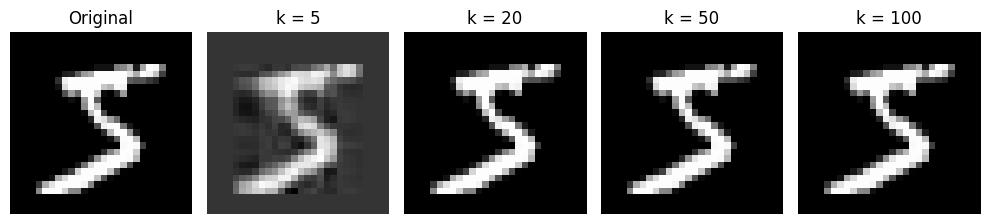

In [7]:
# Visualize original and compressed images
ks = [5, 20, 50, 100]
plt.figure(figsize=(10, 5))
plt.subplot(1, len(ks)+1, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, k in enumerate(ks):
    img_compressed = compress_image(U, S, VT, k)
    plt.subplot(1, len(ks)+1, i+2)
    plt.imshow(img_compressed, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.datasets import fetch_lfw_people

# Load LFW grayscale face images
lfw = fetch_lfw_people(min_faces_per_person=70, resize=0.4)  # 50x37 grayscale images
images = lfw.images
image = images[0]  # Select first image for demo

# Perform SVD
U, S, VT = np.linalg.svd(image, full_matrices=False)

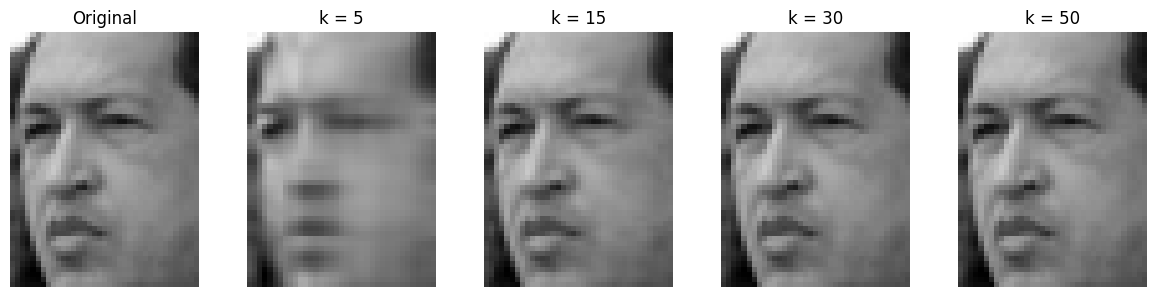

In [10]:
# Plot original and compressed versions
ks = [5, 15, 30, 50]  # Try different ranks
plt.figure(figsize=(12, 3))

plt.subplot(1, len(ks) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

for i, k in enumerate(ks):
    compressed = compress_image(U, S, VT, k)
    plt.subplot(1, len(ks) + 1, i + 2)
    plt.imshow(compressed, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()
